In [3]:
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

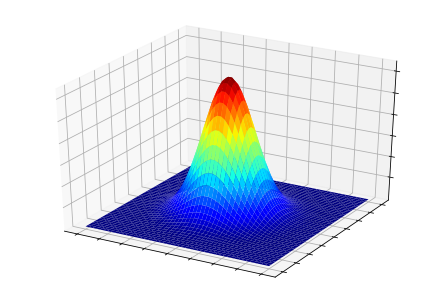

In [64]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-2.0:2.0:50j, -2.0:2.0:50j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

# sigma = np.array([.5, .5])
sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x,y,z, cmap=cm.jet)
#ax.plot_wireframe(x,y,z)

# remove axis values 
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

# remove margins
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig('plots/gaussian.png')

plt.show()


(500, 1)

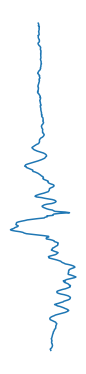

In [65]:
fig = plt.figure()

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

ax = fig.add_subplot(111)
# remove axis values 
ax.set_yticklabels([])
ax.set_xticklabels([])

fig.set_size_inches(1, 5)

# remove border
ax.axis('off')

# remove margins
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

x_validate_hand = np.load('data/validate_Hand_AG.npy')
display(x_validate_hand[0, :, :1].shape)
plt.plot(x_validate_hand[11, :, :1], transform= rot + base)

plt.savefig('plots/sensor_data_example.png')


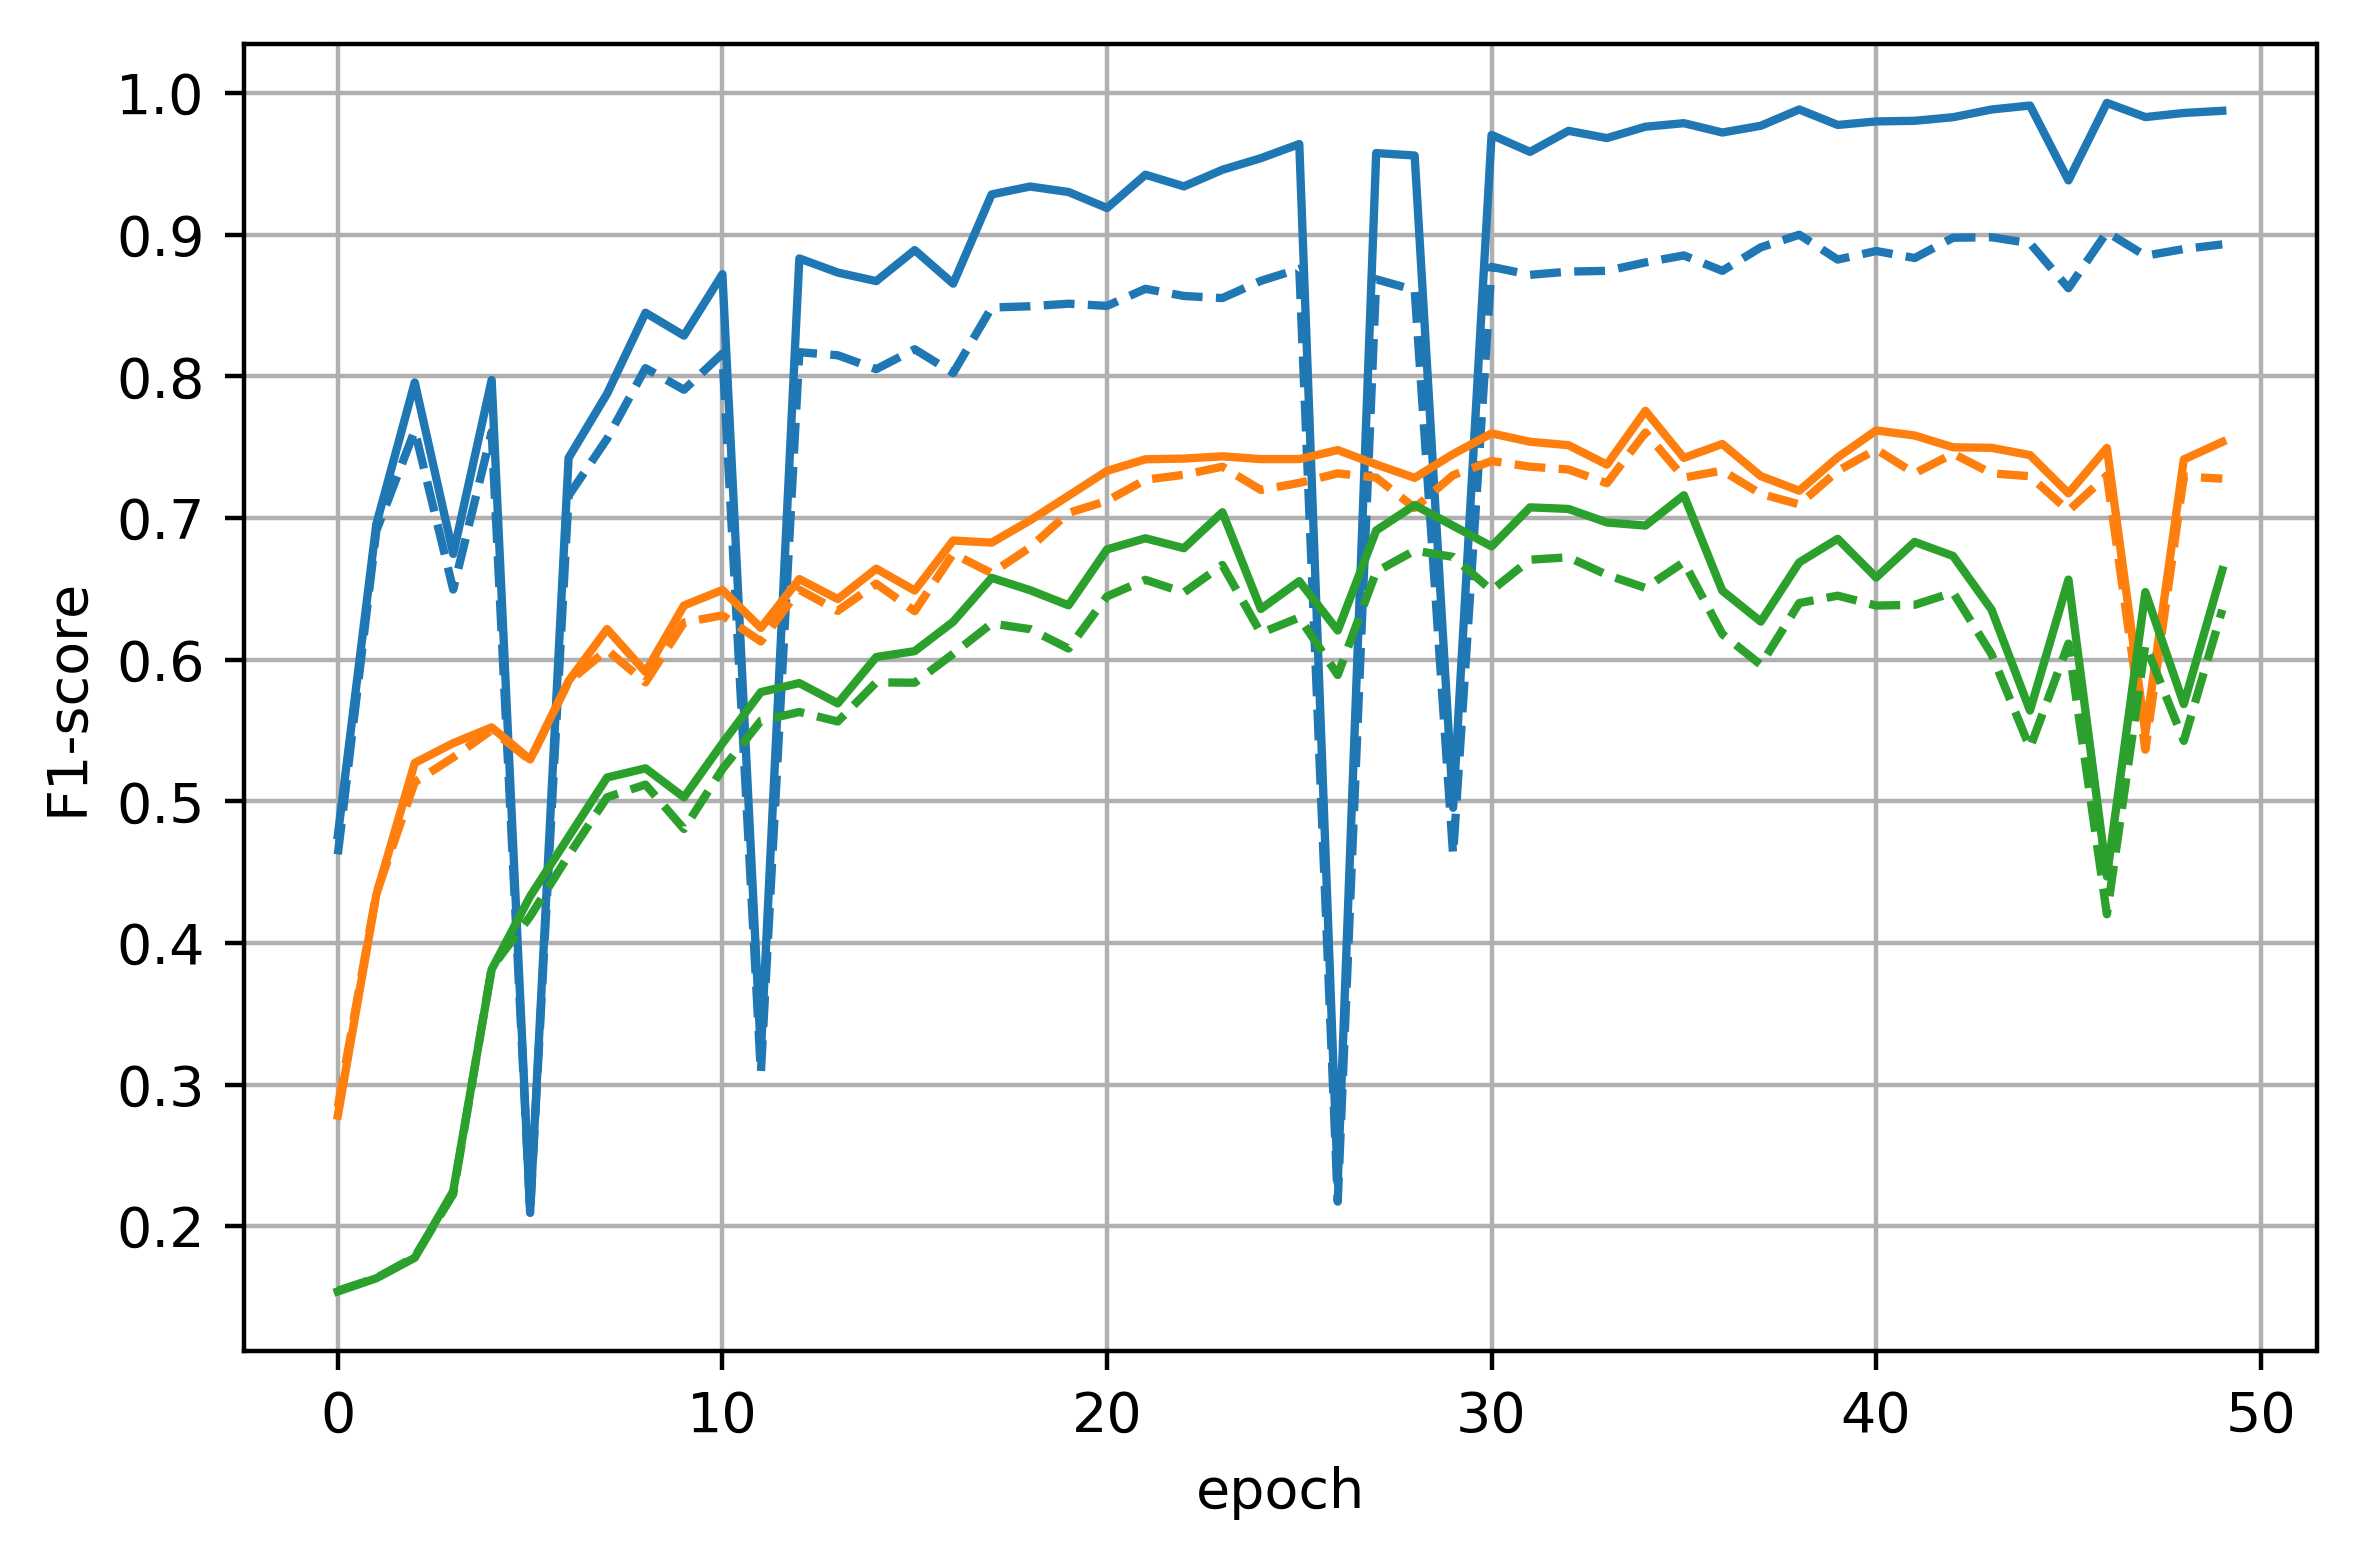

In [91]:
dpi=400

fig, ax = plt.subplots(dpi=dpi)

# We want to show all ticks...
plt.xlabel('epoch')
plt.ylabel('F1-score')
plt.grid(True)
    
f1_score_50_epoch_with_unlabelled_train = np.loadtxt('./plots_values/run-tb_logs_adversarial-autoencoder-20190630T1417-tag-epoch_f1_score.csv', delimiter=',', skiprows=1, usecols=(2,))
f1_score_50_epoch_with_unlabelled_test = np.loadtxt('./plots_values/run-tb_logs_adversarial-autoencoder-20190630T1417-tag-epoch_f1_score_test.csv', delimiter=',', skiprows=1, usecols=(2,))
f1_score_50_epoch_train = np.loadtxt('plots_values/run-tb_logs_adversarial-autoencoder-20190630T0034-tag-epoch_f1_score.csv', delimiter=',', skiprows=1, usecols=(2,))
f1_score_50_epoch_test = np.loadtxt('plots_values/run-tb_logs_adversarial-autoencoder-20190630T0034-tag-epoch_f1_score_test.csv', delimiter=',', skiprows=1, usecols=(2,))
f1_score_500_epoch_train = np.loadtxt('plots_values/run-tb_logs_adversarial-autoencoder-20190629T2035-tag-epoch_f1_score.csv', delimiter=',', skiprows=1, usecols=(2,))
f1_score_500_epoch_test = np.loadtxt('plots_values/run-tb_logs_adversarial-autoencoder-20190629T2035-tag-epoch_f1_score_test.csv', delimiter=',', skiprows=1, usecols=(2,))


colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(f1_score_50_epoch_with_unlabelled_train, color=colors[0])
plt.plot(f1_score_50_epoch_with_unlabelled_test, color=colors[0], linestyle='--')
plt.plot(f1_score_50_epoch_train, color=colors[1])
plt.plot(f1_score_50_epoch_test, color=colors[1], linestyle='--')
plt.plot(f1_score_500_epoch_train, color=colors[2])
plt.plot(f1_score_500_epoch_test, color=colors[2], linestyle='--')

fig.tight_layout()

plt.savefig('plots/f1-score_plots.png', dpi=dpi)

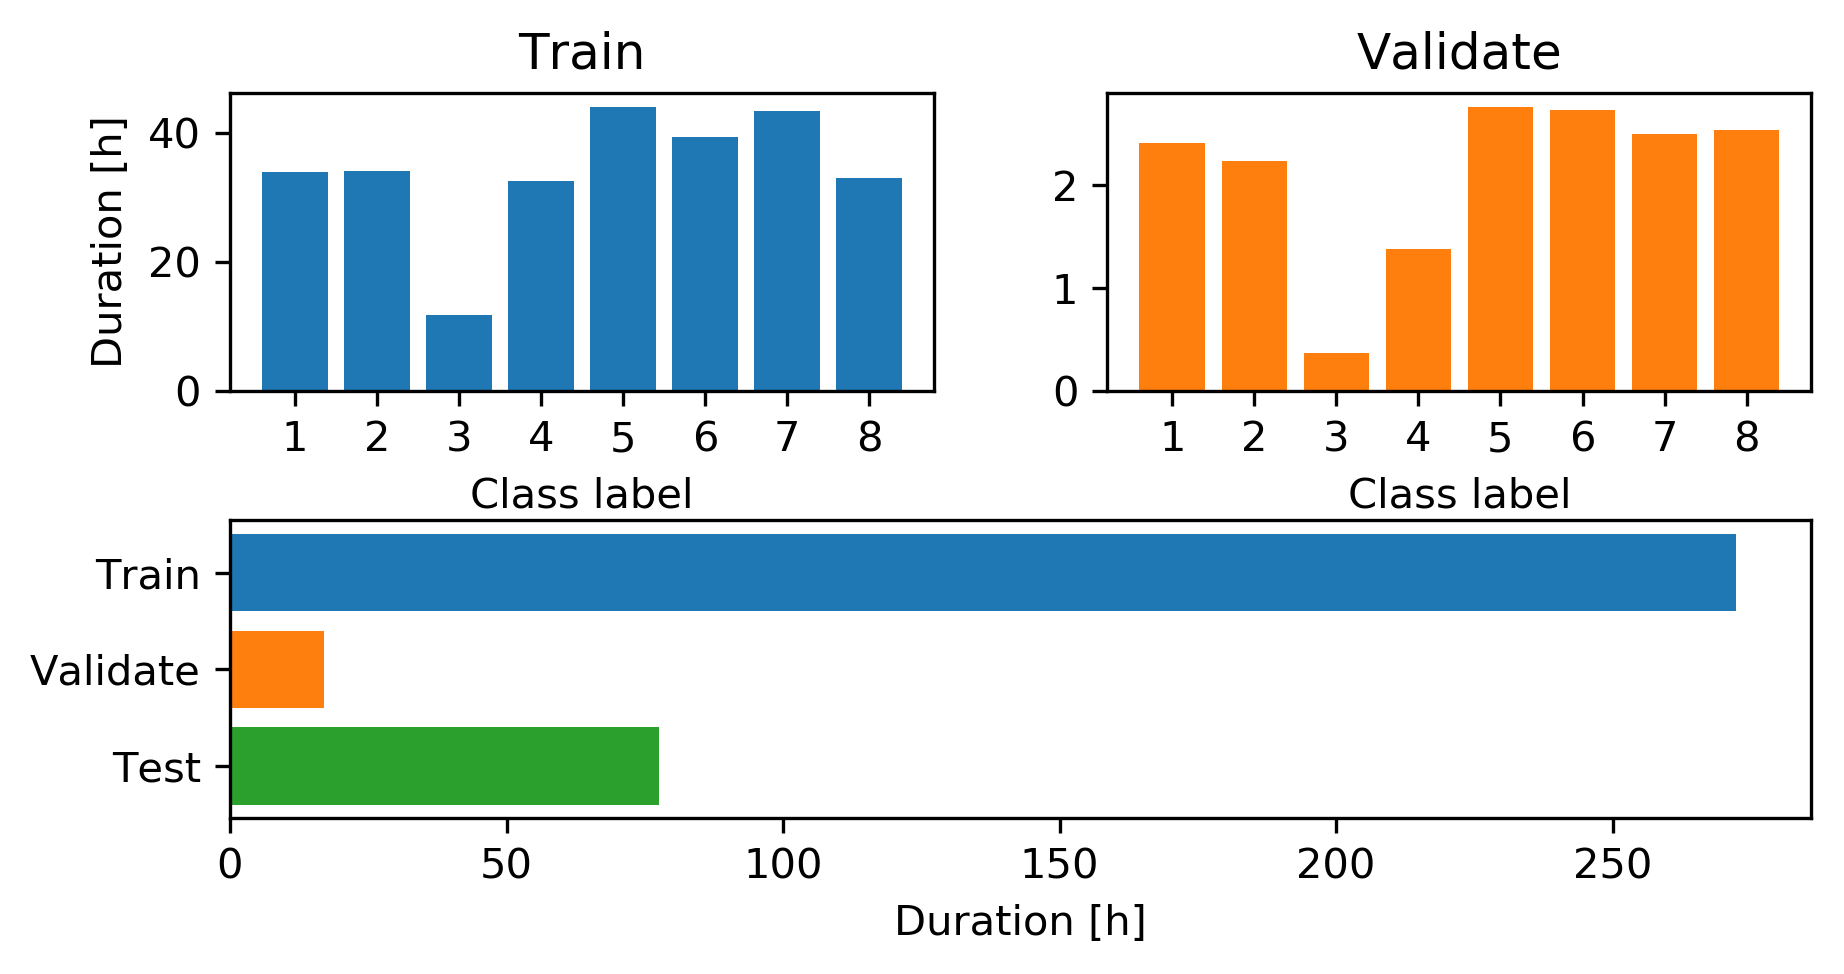

In [9]:
def plot_labels_stats(dpi=300):
    train_unique_labels =  np.unique(np.load('data/train_Bag_Label.npy'), return_counts=True)
    validate_unique_labels = np.unique(np.load('data/validate_Hand_Label.npy'), return_counts=True)
    test_data_len = np.load('data/test_Hand_AG.npy')
    
    dataset_parts_size = [sum(train_unique_labels[1]) / 360000,
                          sum(validate_unique_labels[1]) / 360000,
                          test_data_len.shape[0] * test_data_len.shape[1] / 360000]

    fig, axs = plt.subplots(nrows=2, ncols=2, dpi=dpi, figsize=(6,3))
    
    #fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]
    
    # each sample contains 500 values of the 5 seconds period
    ax = plt.subplot(221)
    ax.bar(np.arange(len(train_unique_labels[0])) + 1, train_unique_labels[1] / 360000, label='Train', color=colors[0])
    ax.set(xticks=train_unique_labels[0])
    ax.set(ylabel='Duration [h]', xlabel='Class label', title='Train')
    
    ax = plt.subplot(222)
    ax.bar(np.arange(len(validate_unique_labels[0])) + 1, validate_unique_labels[1] / 360000, label='Validate', color=colors[1])
    ax.set(xticks=train_unique_labels[0])
    ax.set(xlabel='Class label', title='Validate')
    
    ax = plt.subplot(212)
    # ax.remove()
    ax.invert_yaxis()
    rects = ax.barh(
        ['Train', 'Validate', 'Test'], 
        dataset_parts_size, 
        label='Validate',
        color=(colors[0], colors[1], colors[2],))
    ax.set(xlabel='Duration [h]')

    
    plt.savefig('plots/labels_stats.png', dpi=dpi, bbox_inches='tight')
    plt.show()

        
plot_labels_stats()